# Clustering Interpretation with Decision Trees

In [75]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [76]:
path="https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Customer-Personality-Analysis-2.0/main/Data/Clustered%20Data/Clustered_Data(FCM).csv?token=GHSAT0AAAAAACL3VCJBG7U5VSO7DYZ6TAPYZRJIBHQ"
df = pd.read_csv(path)

In [77]:
df.shape

(2234, 64)

In [78]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [79]:
# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

ID                         0
Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
                          ..
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Cluster                    0
Length: 64, dtype: int64
ID                         0
Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
                          ..
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Cluster                    0
Length: 64, dtype: int64


In [80]:
# Separate features and target variable
# X = df.drop(['ID', 'Clusters'], axis=1)  # drop the ID and Clusters column
# y = df['Clusters']
X = df.drop(['ID', 'Cluster'], axis=1)  # drop the ID and Clusters column
y = df['Cluster']

# Split the data into training and testing sets for validation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test_scaled)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Convert class names to string explicitly to avoid TypeError
class_names_str = np.unique(y).astype(str)

# Attempt to plot the decision tree again with the corrected class names
plt.figure(figsize=(200, 50))
plot_tree(clf, filled=True, fontsize=15, feature_names=X.columns, class_names=class_names_str)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       180
           1       0.91      0.93      0.92       146
           2       0.86      0.81      0.83       121

    accuracy                           0.91       447
   macro avg       0.90      0.90      0.90       447
weighted avg       0.91      0.91      0.91       447



Cross-validation scores: [0.93736018 0.94854586 0.95302013 0.93959732 0.94618834]
Mean cross-validation score: 0.9449423661480122


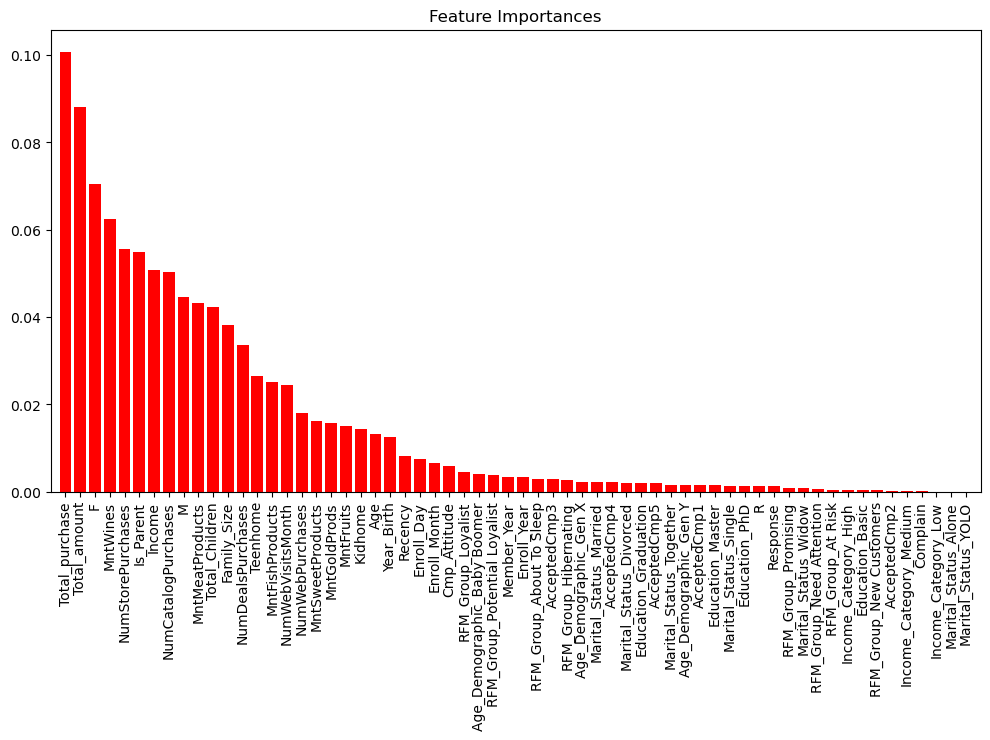

In [82]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Random Forest Classifier
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [83]:
# Display feature importance in table format
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Top 10 feature importance table
feature_importance_df.head(10)


,Feature,Importance
29,Total_purchase,0.100786
28,Total_amount,0.088061
35,F,0.070414
5,MntWines,0.062565
14,NumStorePurchases,0.055652
31,Is_Parent,0.054978
1,Income,0.050783
13,NumCatalogPurchases,0.050284
36,M,0.044659
7,MntMeatProducts,0.043324


Cross-validation scores: [0.93854749 0.93296089 0.95238095 0.93837535 0.94397759]
Mean cross-validation score: 0.9412484546891383


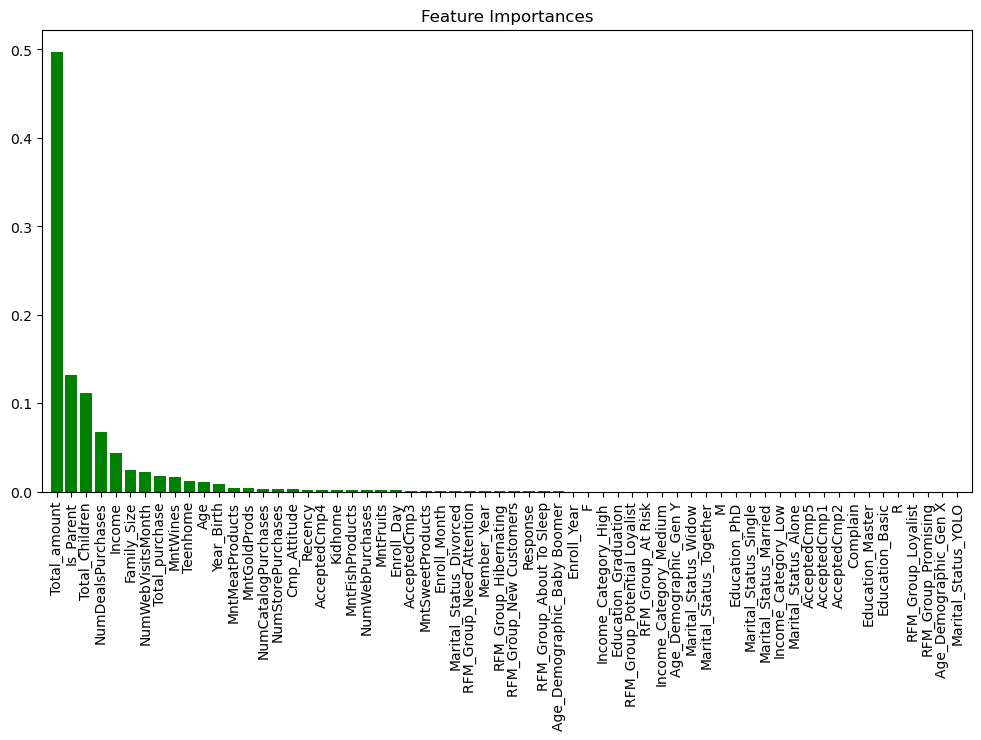

In [84]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(gbm, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Gradient Boosting Classifier
gbm.fit(X_train, y_train)

# Get feature importances
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [85]:
# Display feature importance in table format
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Top 10 feature importance table
feature_importance_df.head(10)

,Feature,Importance
28,Total_amount,0.497546
31,Is_Parent,0.131367
30,Total_Children,0.111925
11,NumDealsPurchases,0.067454
1,Income,0.044012
32,Family_Size,0.024162
15,NumWebVisitsMonth,0.022414
29,Total_purchase,0.017390
5,MntWines,0.016584
3,Teenhome,0.011825
